## Processing k6 results

In [8]:
import json
SETUP_PATH = './setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
import sys
sys.path.append('../common')
import utils

dir = utils.get_last_result_dir(setup_data=data)
print(dir)

for key in data["apps"]:
    fw = data["apps"][key]
    path = os.path.join(dir, f'{fw["name"]}.csv')
    print(path)
    data["apps"][key]['df'] = pd.read_csv(path)

out/out_2024-06-01_15-37-29
out/out_2024-06-01_15-37-29/.NET.csv
out/out_2024-06-01_15-37-29/Django.csv
out/out_2024-06-01_15-37-29/NestJS.csv


duration: 0     1066.448606
1     1026.203822
2      984.745046
3      945.155256
4     1042.138881
5     1042.836796
6     1026.811790
7     1206.719638
8     1195.743556
9     1106.277016
10    1021.328617
11    1119.032553
12     991.313440
13     917.174416
14     937.696340
Name: metric_value, dtype: float64


duration: 0    4468.076636
1    4442.115549
2    4156.647050
3    4164.836170
4    4189.598798
5    4147.717669
Name: metric_value, dtype: float64
duration: 0     1551.469642
1     1243.988062
2     1230.896643
3     1149.305255
4     1235.729897
5     1221.499022
6     1457.431120
7     1226.538727
8     1274.712450
9     1208.844633
10    1264.920083
11    1143.113031
12    1368.024331
13    1206.993827
Name: metric_value, dtype: float64


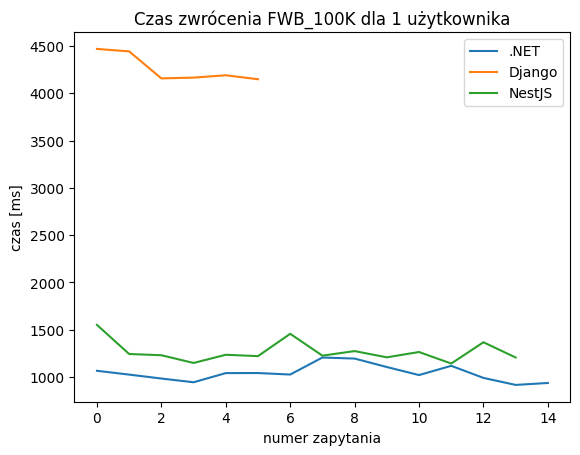

In [11]:
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.reset_index(drop=True)
    duration = df_1['metric_value']
    print(f'duration: {duration}')
    title = f'Czas zwrócenia FWB_100K dla {data["vus"]} {"użytkowników" if data["vus"] > 1 else "użytkownika"}'
    sns.lineplot(data=duration, label=f'{fw["name"]}').set(title=title, xlabel="numer zapytania", ylabel="czas [ms]")
    plt.savefig('Request_duration_for_FWB_100K_user.png')

In [12]:
dataframesMap = {}

for key in data["apps"]:
    df_2 = pd.DataFrame()
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.filter(['timestamp', 'metric_value'])
    df_2[key + '_duration'] = df_1['metric_value']
    dataframesMap[key] = df_2
    print(df_2.describe())



       dotnet_duration
count        15.000000
mean       1041.975052
std          86.200755
min         917.174416
25%         988.029243
50%        1026.811790
75%        1086.362811
max        1206.719638
       django_duration
count         6.000000
mean       4261.498645
std         150.831112
min        4147.717669
25%        4158.694330
50%        4177.217484
75%        4378.986361
max        4468.076636
       nestjs_duration
count        14.000000
mean       1270.247623
std         114.357789
min        1143.113031
25%        1212.008230
50%        1233.313270
75%        1272.264358
max        1551.469642


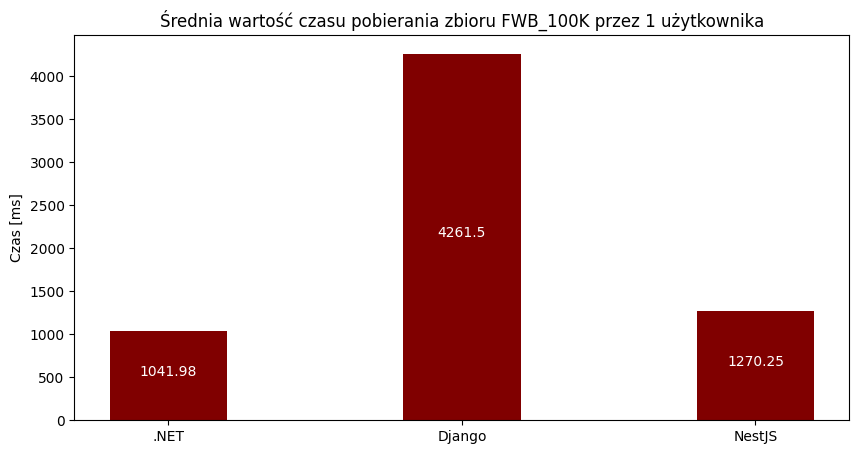

In [15]:
# creating the dataset
frameworks = list(map(lambda x: x['name'], data["apps"].values()))
mean_duration = [dataframesMap[key][key + '_duration'].mean() for key in dataframesMap]

  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(frameworks, mean_duration, color ='maroon', 
        width = 0.4)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i], 2), ha = 'center', c="white")

addlabels(frameworks, mean_duration)
 
# plt.xlabel("Courses offered")
plt.ylabel("Czas [ms]")
plt.title("Średnia wartość czasu pobierania zbioru FWB_100K przez 1 użytkownika")
# plt.show()
plt.savefig('Mean_duration_for_FWB_100K_user.png')

Text(0.5, 1.0, 'Quantity of records for .NET with 1 user')

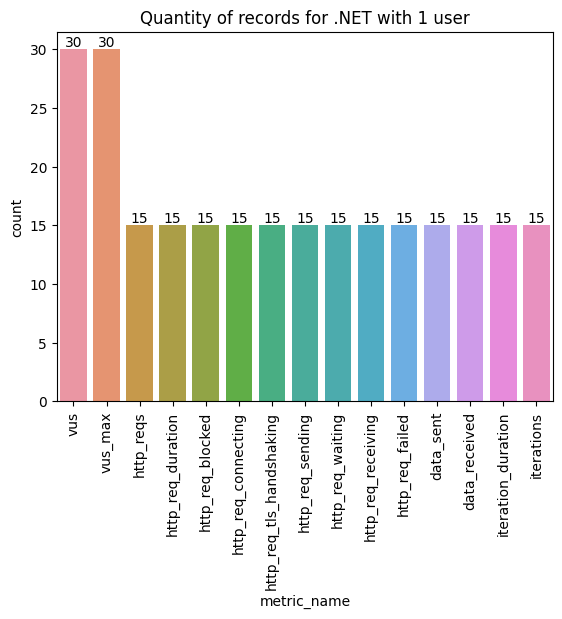

In [16]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for Django with 1 user')

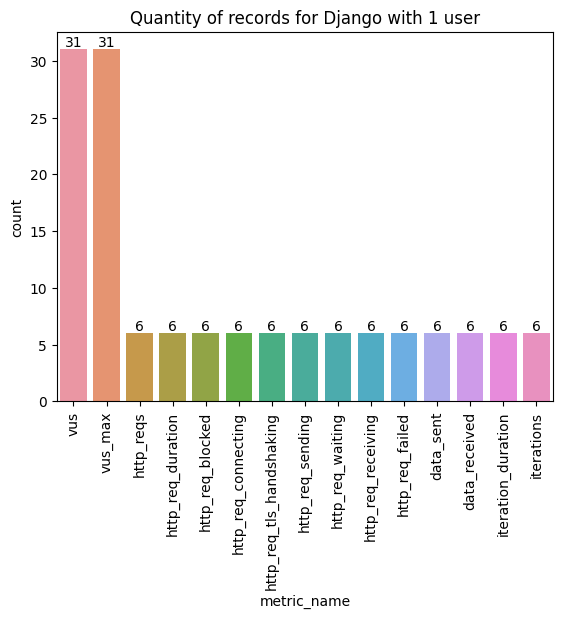

In [17]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for NestJS with 1 user')

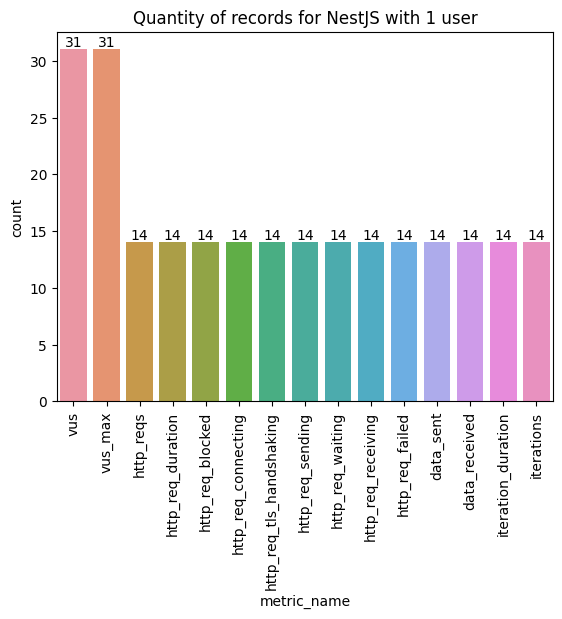

In [18]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')